In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical


In [3]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive (1).zip


In [4]:
import zipfile
import os

with zipfile.ZipFile("archive (1).zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

os.listdir("dataset")


['archive']

In [5]:
import zipfile
import os

with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

os.listdir("dataset")


['archive']

In [6]:
os.listdir("dataset/archive")


['train', 'test']

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [10]:
train_path = "dataset/archive/train"
test_path = "dataset/archive/test"

train_datagen = ImageDataGenerator(rescale=1./255)  # piksel değerlerini 0-1 arası yapar
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=64,
    shuffle=True
)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=64,
    shuffle=False
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # aşırı öğrenmeyi önler
model.add(Dense(7, activation='softmax'))  # 7 duygu

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 839,047 (3.20 MB)

 Trainable params: 839,047 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)


Epoch 1/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 97s 215ms/step - accuracy: 0.5775 - loss: 1.0944 - val_accuracy: 0.5344 - val_loss: 1.2186
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 89s 199ms/step - accuracy: 0.5968 - loss: 1.0551 - val_accuracy: 0.5364 - val_loss: 1.2166
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 86s 192ms/step - accuracy: 0.6045 - loss: 1.0306 - val_accuracy: 0.5365 - val_loss: 1.2338
Epoch 4/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 90s 200ms/step - accuracy: 0.6201 - loss: 0.9790 - val_accuracy: 0.5396 - val_loss: 1.2366
Epoch 5/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 90s 200ms/step - accuracy: 0.6346 - loss: 0.9436 - val_accuracy: 0.5444 - val_loss: 1.2460
Epoch 6/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 88s 195ms/step - accuracy: 0.6435 - loss: 0.9105 - val_accuracy: 0.5446 - val_loss: 1.2524
Epoch 7/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 86s 192ms/step - accuracy: 0.6566 - loss: 0.8868 - val_accuracy: 0.5500 - val_loss: 1.2640
Epoch 8/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 90s 200ms/step - accuracy: 0.6617 - loss: 0

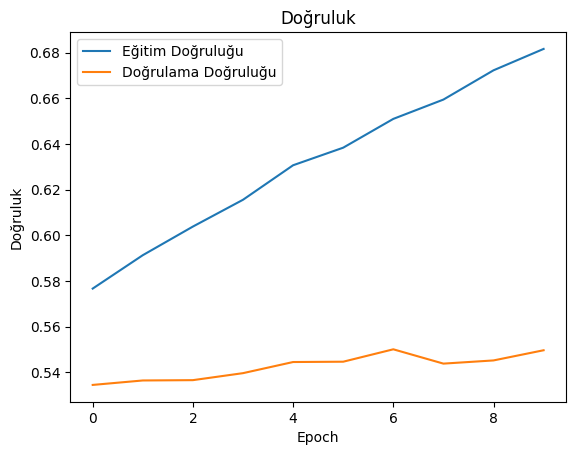

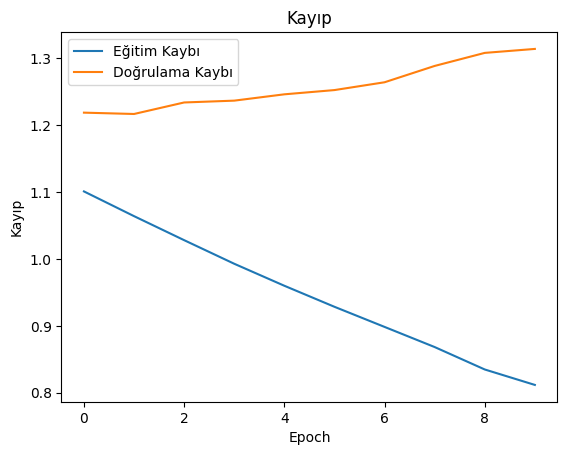

In [14]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()


In [16]:
model.save("duygu_modeli.h5")


In [18]:
model.save("duygu_modeli.keras")


In [19]:
from google.colab import files
files.download("duygu_modeli.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>